In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mylibrary.nnlib as tnn

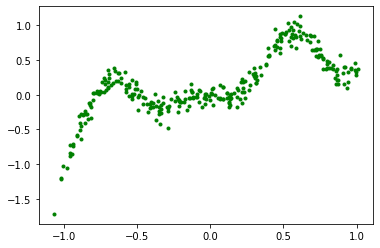

In [2]:
x = np.linspace(0,1,300)
noise = np.random.normal(0,0.02, x.shape)
x = x + noise
x = np.sort(x)

y= (2 * np.sin(10*x) + np.cos(20 * x - 3) + 3 * np.log(10*x + 0.5) - 4)/6.
noise = np.random.normal(0,0.1, x.shape)
y = y + noise

x = x*2
x = x - x.mean() # good practice to zero-center x in linear mapping
xx = x.reshape(-1,1)
yy = y.reshape(-1,1)

%matplotlib inline
plt.scatter(x, y, marker='.', color='g')
plt.show()

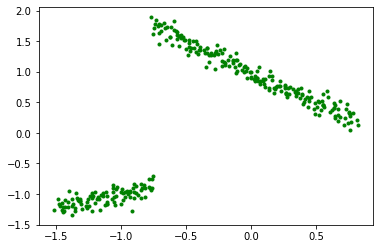

In [3]:
np.random.seed(13)
x = np.linspace(-1.5,0.8,300)
msk = x<-0.75
y = np.zeros_like(x)

# y[msk] = -0.5
# y[~msk] = 1
y[msk] = x[msk]*0.5 - 0.5
y[~msk] = -x[~msk]*1 + 1

noise = np.random.normal(0,0.02, x.shape)
x = x + noise

indx = np.argsort(x)
x = x[indx]
y = y[indx]

noise = np.random.normal(0,0.1, x.shape)
y = y + noise

xx = x.reshape(-1,1)
yy = y.reshape(-1,1)

%matplotlib inline
plt.scatter(x, y, marker='.', color='g')
plt.show()

## Find best split with gradient descent -- scale error around break point with gaussian

In [8]:
# optim = tnn.SGD(0.1)
# optim = tnn.Adam(0.001, 0.5, 0.999)
optim = tnn.Adam(0.01)
linear = tnn.LinearLayer(1,1,optimizer=optim)
linear.weights *= 0

optim = tnn.Adam(0.03)
line0 = tnn.LinearLayer(1,1, optimizer=optim)
line1 = tnn.LinearLayer(1,1, optimizer=optim)
# line0.weights *= 0
# line1.weights *= 0

gaussian = tnn.Gaussian()

In [9]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

for epoch in range(100000):

    lout = linear.forward(xx)
    err_scaler = gaussian.forward(lout) ### ??? same as sigmoid based 
#     err_scaler = 1
    
#     line0.weights *= 0
#     line1.weights *= 0
    
    mask0 = lout>0
    mask1 = ~mask0    
    
    l0 = line0.forward(xx)
    l1 = line1.forward(xx)
    y0 = l0*mask0
    y1 = l1*mask1
    
    yout = y0 + y1
    
    dy = yout - yy
    
    
    dy0 = dy
    dy1 = dy
    
    dl0 = dy0*(mask0)
    dl1 = dy1*(mask1)
    
    
    ##########11111111111
#     dyl = dy*err_scaler
#     dxl = linear.backward(dyl)#*0.25)
#     dx0 = line0.backward(dl0)
#     dx1 = line1.backward(dl1)
#     dx = dxl + dx0  + dx1
    ##########11111111111
    ##########22222222222
#     dx0 = line0.backward(dl0)
#     dx1 = line1.backward(dl1)
#     dxl = linear.backward(dy*err_scaler)
    
#     dxl = linear.backward((dx0+dx1).mean(axis=1, keepdims=True)*err_scaler)#*0.25)
    
#     dx = dxl + dx0  + dx1
##############333333333333333
    
    dx0 = line0.backward(dl0)
    dx1 = line1.backward(dl1)
#     dyl = -1 * dy*err_scaler
#     dyl = -(dy*mask0-dy*mask1)*err_scaler
#     dyl = (dy*mask0-dy*mask1)*(xx+1)/2*err_scaler
#     dyl = (dy*yout)*err_scaler
#     dyl = (dy*xx)*err_scaler
#     dyl = (dy*xx + dy)*err_scaler/2
    dyl = (l0-l1)*dy*err_scaler
    dxl = linear.backward(dyl)#/0.25)
    
    dx = dxl + dx0  + dx1
    
    linear.update()
    line0.update()
    line1.update()
    
    dy = yout - yy
    
    if epoch%100 == 0:
        
        error = (dy**2).mean()
        print(epoch, 'Error = ', error)
        ax.clear() 
        ax.scatter(x, y, marker='.', color='g')
        ax.scatter(x, yout.reshape(-1), color='r', marker='.')
        ax.scatter(x, (dyl).reshape(-1), color='c', marker='.')
        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if error < 0.00025:
            print('fitted to our expectation')
            break


0 Error =  1.4724445319800439


100 Error =  0.46225212468589966


200 Error =  0.2921435683601976


300 Error =  0.2532267332710173


400 Error =  0.24534077040419278


500 Error =  0.24294470487996306


600 Error =  0.2398743192184545


700 Error =  0.2390449749925811


800 Error =  0.23862127274628392


900 Error =  0.23840515170544374


1000 Error =  0.23835363199166737


1100 Error =  0.23768807025195357


1200 Error =  0.22577389118541394


1300 Error =  0.20340185653840137


1400 Error =  0.1659555297511313


1500 Error =  0.12414340645854949


1600 Error =  0.09055596027876832


1700 Error =  0.0540758745704556


1800 Error =  0.03471233488857494


1900 Error =  0.03407698681230135


2000 Error =  0.053442751673709876


2100 Error =  0.053429921953996595


2200 Error =  0.05345518206190789


2300 Error =  0.03422599142017528


2400 Error =  0.05343495438301264


2500 Error =  0.03422888455972333


2600 Error =  0.05347903008312765


2700 Error =  0.0534324610189073


2800 Error

TclError: invalid command name "pyimage24"

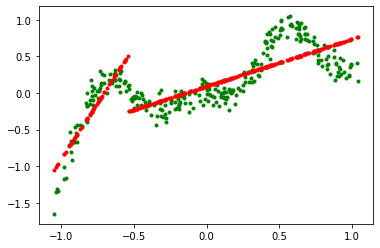

In [46]:
%matplotlib inline
plt.scatter(x, y, marker='.', color='g')
plt.scatter(x, yout.reshape(-1), color='r', marker='.')

In [18]:
linear.weights, linear.bias

(array([[-4.8758828]]), array([-3.69090159]))

## Sigmoid based,, it has gaussian gradient scaling

In [61]:
# optim = tnn.SGD(0.1)
optim = tnn.Adam(0.01)
linear = tnn.LinearLayer(1,1,optimizer=optim)
linear.weights*=0

# optim = tnn.Adam(0.1)
line0 = tnn.LinearLayer(1,1, optimizer=optim)
line1 = tnn.LinearLayer(1,1, optimizer=optim)
line0.weights *= 0
line1.weights *= 0

sigmoid = tnn.Sigmoid()

In [62]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

for epoch in range(100000):
    
#     line0.weights *= 0
#     line1.weights *= 0

    lout = sigmoid.forward(linear.forward(xx))
    
    mask0 = lout>0.5 ## equivalent to double relu splits
    mask1 = ~mask0    
       
    l0 = line0.forward(xx)
    l1 = line1.forward(xx)
    y0 = l0*mask0
    y1 = l1*mask1
    
    yout = y0 + y1
    
    dy = yout - yy
    
    
    dy0 = dy
    dy1 = dy
    
    dl0 = dy0*(mask0)
    dl1 = dy1*(mask1)
    
    ###########1111111111
    dys = dy    
    dyl = sigmoid.backward(dys)
    dxl = linear.backward(dyl)#/0.25)
    dx0 = line0.backward(dl0)
    dx1 = line1.backward(dl1)
    dx = dxl + dx0  + dx1
    ##########22222222222
#     dys = y0*dy + y1*dy
#     dx0 = line0.backward(dl0)
#     dx1 = line1.backward(dl1)
#     dxl = linear.backward(sigmoid.backward((dx0+dx1).mean(axis=1, keepdims=True)*err_scaler))
    ##############333333333333333
    
    dx0 = line0.backward(dl0)
    dx1 = line1.backward(dl1)
#     dys = (dy*xx)
    dys = (dy*xx + dy)
#     print(dys)
#     print(np.count_nonzero(mask0))
    
    dyl = sigmoid.backward(dys)
    dxl = linear.backward(dyl)#/0.25)
    
    dx = dxl + dx0  + dx1
    
    linear.update()
    line0.update()
    line1.update()
    
    dy = yout - yy
    
    if epoch%100 == 0:
        error = (dy**2).mean()
        print(epoch, 'Error = ', error)
        ax.clear() 
        ax.scatter(x, y, marker='.', color='g')
        ax.scatter(x, yout.reshape(-1), color='r', marker='.')
        ax.scatter(x, dyl.reshape(-1), color='c', marker='.')
        
        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if error < 0.00025:
            print('fitted to our expectation')
            break

0 Error =  0.21983227626947383


100 Error =  0.08869453752748607


200 Error =  0.09122924260055298


300 Error =  0.08957818554366082


400 Error =  0.08739817282209109


500 Error =  0.08484014278137644


600 Error =  0.0817728560063892


700 Error =  0.07848353697006956


800 Error =  0.07428017123165635


900 Error =  0.06778223114987086


1000 Error =  0.0647115706377143


1100 Error =  0.06091210077982208


1200 Error =  0.08932733269651234


1300 Error =  0.09699225865254739


1400 Error =  0.09124963464769896


1500 Error =  0.08988782559409986


1600 Error =  0.08429955884916403


1700 Error =  0.07861396201097495


1800 Error =  0.07423394614709072


1900 Error =  0.0709422247135351


2000 Error =  0.06813801740257099


2100 Error =  0.06594387169786095


2200 Error =  0.06560068278644474


2300 Error =  0.06510511652147348


2400 Error =  0.06387017779190136


2500 Error =  0.06251024994436079


2600 Error =  0.061895577163475025


2700 Error =  0.0618608915976357


2800 Er

TclError: invalid command name "pyimage326"

In [ ]:
%matplotlib inline
plt.scatter(x, y, marker='.', color='g')
plt.scatter(x, yout.reshape(-1), color='r', marker='.')
plt.show()
print(error)

In [10]:
linear.weights, linear.bias

(array([[3.39347003]]), array([2.54610153]))

## DTR Hard diff

In [11]:
optimizer = tnn.Adam()
prob = tnn.LinearLayer(1,1,optimizer=optimizer)
linear0 = tnn.LinearLayer(1,1, optimizer=optimizer)
linear1 = tnn.LinearLayer(1,1, optimizer=optimizer)

bias = tnn.BiasLayer(1, optimizer=optimizer)
# gaussian = tnn.Gaussian()

In [12]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

for epoch in range(100000):

    pout = prob.forward(xx)
    ## Using this makes the function continuous
    ## Breaking this makes it discontinuous
#     linear0.bias*=0.
#     linear1.bias*=0.
##     bias.bias *= 0

#     linear0.weights *=0.
#     linear1.weights *=0.
    
    l0 = linear0.forward(pout)
    l1 = linear1.forward(pout)
    
    mask0 = pout>0
    mask1 = ~mask0    

    y0 = l0*mask0
    y1 = l1*mask1
    
    yout_ = y0 + y1
    yout = bias.forward(yout_)
    
    dy = yout - yy
    
    dy_ = bias.backward(dy)
    dy0 = dy_
    dy1 = dy_
    
    dl0 = dy0*(mask0)
    dl1 = dy1*(mask1)
    
    dpout0 = linear0.backward(dl0)
    dpout1 = linear1.backward(dl1)
    
#     dpout_ = dy0*l0*mask0 + dy1*l1*mask1
    
    dpout = dpout0 + dpout1
#     dpout = dy
    dx = prob.backward(dpout)#*gaussian.forward(pout))
    
    prob.update()
    linear0.update()
    linear1.update()
    bias.update()

    if epoch%100 == 0:
        
        error = (dy**2).mean()
        print(epoch, 'Error = ', error)
        ax.clear() 
        ax.scatter(x, y, marker='.', color='g')
        ax.scatter(x, yout.reshape(-1), color='r', marker='.')
        ax.scatter(x, dpout.reshape(-1), color='c', marker='.')
        
        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if error < 0.00025:
            print('fitted to our expectation')
            break

0 Error =  0.9349014793861333


100 Error =  0.06846403976327436


200 Error =  0.06495205624966272


300 Error =  0.06416889141739476


400 Error =  0.06413266868016021


500 Error =  0.06413108741159182


600 Error =  0.06413105017679713


700 Error =  0.06413104974361439


800 Error =  0.0641310497412621


900 Error =  0.06413104974125676


TclError: invalid command name "pyimage37"

## Gaussian, decision boundary, continued regression

In [13]:
# optim = tnn.SGD(0.1)
optim = tnn.Adam(0.01)
linear = tnn.LinearLayer(1,1,optimizer=optim)

# optim = tnn.Adam(0.01)
line0 = tnn.LinearLayer(1,1, optimizer=optim)
line1 = tnn.LinearLayer(1,1, optimizer=optim)
# line0.weights *= 0
# line1.weights *= 0

gaussian = tnn.Gaussian()

In [14]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

for epoch in range(100000):

    lout = linear.forward(xx)
    err_scaler = gaussian.forward(lout) ### ??? same as sigmoid based 
#     err_scaler = 1
    
#     line0.weights *= 0
#     line1.weights *= 0
    
    mask0 = lout>0
    mask1 = ~mask0    
    
    l0 = line0.forward(lout)
    l1 = line1.forward(lout)
    y0 = l0*mask0
    y1 = l1*mask1
    
    yout = y0 + y1
    
    dy = yout - yy
    
    
    dy0 = dy
    dy1 = dy
    
    dl0 = dy0*(mask0)
    dl1 = dy1*(mask1)
    
    dlout0 = line0.backward(dl0)
    dlout1 = line1.backward(dl1)
    dlout = dlout0 + dlout1
    
    dxl = linear.backward(dlout*err_scaler)#*0.25)
    dx = dxl + dx0  + dx1
    
    linear.update()
    line0.update()
    line1.update()
    
    if epoch%100 == 0:
        
        error = (dy**2).mean()
        print(epoch, 'Error = ', error)
        ax.clear() 
        ax.scatter(x, y, marker='.', color='g')
        ax.scatter(x, yout.reshape(-1), color='r', marker='.')
        ax.scatter(x, (dy*err_scaler).reshape(-1), color='c', marker='.')
        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if error < 0.00025:
            print('fitted to our expectation')
            break


0 Error =  0.8751965626307342


100 Error =  0.07875438467519459


200 Error =  0.06342058447464857


300 Error =  0.0671497590082848


400 Error =  0.06316239466269129


500 Error =  0.06260137265931315


600 Error =  0.06104673935227665


700 Error =  0.05759463112647955


800 Error =  0.05377811723932852


900 Error =  0.04992652840485514


1000 Error =  0.04804700571434308


1100 Error =  0.045315150639010815


1200 Error =  0.04298771901572924


1300 Error =  0.040724764127303775


1400 Error =  0.03820169508245339


1500 Error =  0.03401766108474895


1600 Error =  0.028406997966816925


1700 Error =  0.02445393443968299


1800 Error =  0.01723146142843672


1900 Error =  0.016915366801158408


2000 Error =  0.01691285205655322


2100 Error =  0.01691318310161085


2200 Error =  0.01691266808626969


2300 Error =  0.01691222727589473


2400 Error =  0.016912316147648227


2500 Error =  0.016913188105483375


2600 Error =  0.016911836312664453


2700 Error =  0.016911759854147827


TclError: invalid command name "pyimage49"

### Sigmoid decision boundary scaling

In [15]:
# optim = tnn.SGD(0.1)
optim = tnn.Adam(0.01)
linear = tnn.LinearLayer(1,1,optimizer=optim)

line0 = tnn.LinearLayer(1,1, optimizer=optim)
line1 = tnn.LinearLayer(1,1, optimizer=optim)
line0.weights *= 0
line1.weights *= 0

sigmoid = tnn.Sigmoid()

In [16]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

for epoch in range(100000):

    lout = linear.forward(xx)
    pout = sigmoid.forward(lout)
#     err_scaler = 1
    
#     line0.weights *= 0
#     line1.weights *= 0
    
    mask0 = lout>0
    mask1 = ~mask0    
    
    l0 = line0.forward(lout)
    l1 = line1.forward(lout)
    y0 = l0*mask0
    y1 = l1*mask1
    
    yout = y0 + y1
    
    dy = yout - yy
    
    
    dy0 = dy
    dy1 = dy
    
    dl0 = dy0*(mask0)
    dl1 = dy1*(mask1)
    
    dlout0 = line0.backward(dl0)
    dlout1 = line1.backward(dl1)
    dlout = dlout0 + dlout1
    
    dpout = sigmoid.backward(dlout)
    dxl = linear.backward(dpout)
    
    linear.update()
    line0.update()
    line1.update()
    
    if epoch%100 == 0:
        
        error = (dy**2).mean()
        print(epoch, 'Error = ', error)
        ax.clear() 
        ax.scatter(x, y, marker='.', color='g')
        ax.scatter(x, yout.reshape(-1), color='r', marker='.')
        ax.scatter(x, (dpout).reshape(-1), color='c', marker='.')
        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if error < 0.00025:
            print('fitted to our expectation')
            break

0 Error =  1.2111264788413785


100 Error =  0.0932855200831831


200 Error =  0.06606231297929553


300 Error =  0.06324419929402382


400 Error =  0.06387331028582689


500 Error =  0.06431019379719183


600 Error =  0.06431190371066231


700 Error =  0.06416477176768293


800 Error =  0.0641309120406869


900 Error =  0.06408179816381503


1000 Error =  0.06397359251869872


1100 Error =  0.06364590205140755


1200 Error =  0.06308805900266667


1300 Error =  0.06288284823835007


1400 Error =  0.06212351996704347


1500 Error =  0.060361159930168044


1600 Error =  0.057548268845029


1700 Error =  0.05543850140255909


1800 Error =  0.053547725156699914


1900 Error =  0.04991259513401701


2000 Error =  0.04989076163296735


2100 Error =  0.04715025072002988


2200 Error =  0.04529425639199081


2300 Error =  0.042985989579896015


2400 Error =  0.04298531729749545


2500 Error =  0.04065052669184459


2600 Error =  0.03819857560237609


2700 Error =  0.034038974395039084


2800 

TclError: invalid command name "pyimage62"

In [74]:
linear.weights

array([[-5.81297574]])

## Soft Decision Tree Style

In [6]:
# optim = tnn.SGD(0.1)
optim = tnn.Adam(0.01)
linear = tnn.LinearLayer(1,1,optimizer=optim)
# linear.weights*=0

# optim = tnn.Adam(0.1)
line0 = tnn.LinearLayer(1,1, optimizer=optim)
line1 = tnn.LinearLayer(1,1, optimizer=optim)
# line0.weights *= 0
# line1.weights *= 0

sigmoid = tnn.Sigmoid()

In [7]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

for epoch in range(100000):

    lout = sigmoid.forward(linear.forward(xx))
    
    mask0 = lout>0.5 ## equivalent to double relu splits
    mask1 = ~mask0    
       
    l0 = line0.forward(xx)
    l1 = line1.forward(xx)
    y0 = l0*mask0
    y1 = l1*mask1
    
    yout = y0 + y1
    
    dy = yout - yy
    
    
    dy0 = dy
    dy1 = dy
    
    dl0 = dy0*(mask0)
    dl1 = dy1*(mask1)
    
#     dys = (dy*xx + dy)
    dys = l0*dy-l1*dy 
    dyl = sigmoid.backward(dys)
    dxl = linear.backward(dyl)
    
    dx0 = line0.backward(dl0)
    dx1 = line1.backward(dl1)
    
    dx = dxl + dx0  + dx1
    
    linear.update()
    line0.update()
    line1.update()
    
    dy = yout - yy
    
    if epoch%100 == 0:
        error = (dy**2).mean()
        print(epoch, 'Error = ', error)
        ax.clear() 
        ax.scatter(x, y, marker='.', color='g')
        ax.scatter(x, yout.reshape(-1), color='r', marker='.')
        ax.scatter(x, dyl.reshape(-1), color='c', marker='.')
        
        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if error < 0.00025:
            print('fitted to our expectation')
            break

0 Error =  1.548618523817241


100 Error =  0.5083055464797923


200 Error =  0.3156195404261381


300 Error =  0.19054919280273833


400 Error =  0.11699119810398756


500 Error =  0.11719044442841041


600 Error =  0.09599046798338759


700 Error =  0.07476040078059006


800 Error =  0.07450454472730567


900 Error =  0.0742474986652792


1000 Error =  0.07401862818258544


1100 Error =  0.05421584964679539


1200 Error =  0.07368500619164303


1300 Error =  0.05386816437549021


1400 Error =  0.05373437052632897


1500 Error =  0.05363459417025589


1600 Error =  0.09560852427947224


1700 Error =  0.05350489498762377


1800 Error =  0.053471415164274276


1900 Error =  0.053451409646134006


2000 Error =  0.05344146476951918


2100 Error =  0.034196476224525166


2200 Error =  0.05344355179954198


2300 Error =  0.05350305438289116


2400 Error =  0.052793554944023276


2500 Error =  0.09255833326876935


2600 Error =  0.299427426616385


2700 Error =  0.23419572820475182


2800 Er

TclError: invalid command name "pyimage11"